## Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/daniehbenotman/Desktop/intelligent-support-ticket-automation/data/raw/telco_support_tickets_dataset.csv')

In [3]:
df.head()

,ticket_id,created_at,channel,ticket_text,language,true_category,true_priority
0,TKT000001,2025-01-13T10:53:35.531Z,call,مش قادر ادخل على حسابي???,ar,Account & Authentication,P3
1,TKT000002,2024-12-25T12:46:11.897Z,app,جودة الخدمة ردية,ar,Complaints & Service Quality,P4
2,TKT000003,2025-02-03T08:23:11.468Z,chat,ما في انترنت خالص,NaN,Network / Connectivity,P4
3,TKT000004,2024-12-04T11:58:39.846Z,call,hello,en,Other,P3
4,TKT000005,2024-12-25T07:34:55.253Z,email,الاشارة راحت تماما,ar,Network / Connectivity,P3


## Structural Checks

In [5]:
df.shape

(2743, 7)

In [6]:
df.dtypes

ticket_id        object
created_at       object
channel          object
ticket_text      object
language         object
true_category    object
true_priority    object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2743 entries, 0 to 2742
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticket_id      2743 non-null   object
 1   created_at     2743 non-null   object
 2   channel        2667 non-null   object
 3   ticket_text    2743 non-null   object
 4   language       2548 non-null   object
 5   true_category  2743 non-null   object
 6   true_priority  2478 non-null   object
dtypes: object(7)
memory usage: 150.1+ KB


## Language Safety Check

In [14]:
df[df['language']=='ar']['ticket_text']

0       مش قادر ادخل على حسابي???
1                جودة الخدمة ردية
4              الاشارة راحت تماما
6                ابغى اغير الباقة
10         تسجيل الشريحة ما اشتغل
                  ...            
2738                 الفاتورة غلط
2739     الخدمة الجديدة ما اتفعلت
2740             مشكلة في الراوتر
2741              الراوتر مش شغال
2742                  خصموا زيادة
Name: ticket_text, Length: 1114, dtype: object

In [15]:
df[df['language'].isna()]['ticket_text']

2                       ما في انترنت خالص
11                   no signal in Egypt!!
32                charged مرتين pls check
35                           احتاج مساعدة
47      complained many times no solution
                      ...                
2658               internet فاصل من الصبح
2680                    bill is incorrect
2701                         app not good
2713             billing غلط محتاج refund
2718         payment failed بس المبلغ راح
Name: ticket_text, Length: 195, dtype: object

In [16]:
df[df['language']=='en']['ticket_text']

3                                        hello
5            payment failed but money deducted
7       billing and also internet problem both
8                         no signal in my area
9                                 app not good
                         ...                  
2730                   package upgrade problem
2731                                  help pls
2733               double charge on my account
2734              same problem again and again
2735                    activation not working
Name: ticket_text, Length: 1434, dtype: object

## Language Distribution

In [17]:
df[df['language']=='ar'].value_counts().sum()

983

In [18]:
df[df['language']=='en'].value_counts().sum()

1256

In [21]:
df['language'].isna().sum()

195

## Category Distribution

In [22]:
df['true_category'].value_counts()

true_category
Network / Connectivity              611
Billing & Payments                  517
Account & Authentication            397
Service Activation / Changes        313
Roaming & International Services    251
Other                               247
Device / Hardware                   209
Complaints & Service Quality        198
Name: count, dtype: int64

In [23]:
df[df['true_category']=='Other'].value_counts()

ticket_id  created_at                channel  ticket_text            language  true_category  true_priority
TKT000004  2024-12-04T11:58:39.846Z  call     hello                  en        Other          P3               1
TKT001813  2024-12-09T17:43:31.712Z  email    help محتاج             ar        Other          P3               1
TKT001716  2025-01-14T11:32:08.204Z  call     الموقع معقد            ar        Other          P4               1
TKT001734  2025-02-02T13:16:59.249Z  email    الموظف غير محترم       ar        Other          P3               1
TKT001746  2024-12-27T08:01:16.120Z  email    عاجل                   ar        Other          P4               1
                                                                                                              ..
TKT000915  2025-02-20T15:58:37.531Z  chat     staff rude             en        Other          P4               1
TKT000934  2024-12-31T08:44:23.020Z  web      need assistance        en        Other          P4     

## Priority Distribution

In [24]:
df['true_priority'].value_counts()

true_priority
P4    1018
P3     973
P2     366
P1     121
Name: count, dtype: int64

In [27]:
df['true_priority'].isna().sum()

265

## Channel Distribution

In [25]:
df['channel'].value_counts()

channel
app      564
email    564
chat     544
web      505
call     490
Name: count, dtype: int64

In [26]:
df['channel'].isna().sum()

76

## Temporal Pattern

#### Date Range

In [29]:
df['created_at'].agg(['min', 'max'])

min    2024-12-01T10:12:13.841Z
max    2025-02-28T20:15:38.471Z
Name: created_at, dtype: object

#### Time of Day

In [30]:
df['created_at'] = pd.to_datetime(df['created_at'])

<Axes: xlabel='created_at'>

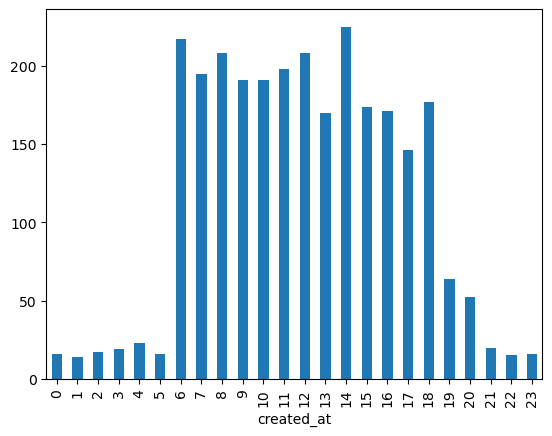

In [33]:
df['created_at'].dt.hour.value_counts().sort_index().plot(kind='bar')

In [34]:
df['created_at'].head()

0   2025-01-13 10:53:35.531000+00:00
1   2024-12-25 12:46:11.897000+00:00
2   2025-02-03 08:23:11.468000+00:00
3   2024-12-04 11:58:39.846000+00:00
4   2024-12-25 07:34:55.253000+00:00
Name: created_at, dtype: datetime64[ns, UTC]

<Axes: xlabel='created_at'>

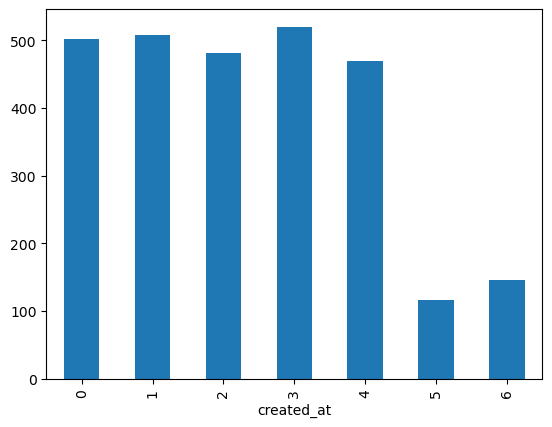

In [37]:
df['created_at'].dt.dayofweek.value_counts().sort_index().plot(kind='bar')

In [38]:
weekday = df['created_at'].dt.dayofweek.isin([0,1,2,3,4])
weekend = df['created_at'].dt.dayofweek.isin([5,6])

In [43]:
df.groupby(weekday).size()

created_at
False     262
True     2481
dtype: int64

In [44]:
df.groupby(weekend).size()

created_at
False    2481
True      262
dtype: int64

## Priority × Time Sanity Check

In [45]:
df.groupby(weekday)['true_priority'].value_counts()

created_at  true_priority
False       P3               109
            P4                82
            P2                31
            P1                13
True        P4               936
            P3               864
            P2               335
            P1               108
Name: count, dtype: int64

## Missing Values

In [49]:
df.isna().any()

ticket_id        False
created_at       False
channel           True
ticket_text      False
language          True
true_category    False
true_priority     True
dtype: bool

In [50]:
df['channel'].isna().sum()

76

In [51]:
df['language'].isna().sum()

195

In [52]:
df['true_priority'].isna().sum()

265